In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [54]:
df_ser = pd.read_csv("C:\\Users\\admin\\Documents\\police_department_analysis\\police-department-calls-for-service.csv")

In [69]:
df_inc = pd.read_csv("C:\\Users\\admin\\Documents\\police_department_analysis\\police-department-incidents.csv")
#print(lon_lan)

In [56]:
df_ser['date_calls'] = pd.to_datetime(df_ser['Call Date Time'])
df_ser['year_calls'] = df_ser['date_calls'].dt.year
df_ser['month_calls'] = df_ser['date_calls'].dt.month
df_ser['day_calls'] = df_ser['date_calls'].dt.day
df_ser['weekday_calls'] = df_ser['date_calls'].dt.weekday
df_ser['hours'] = df_ser['date_calls'].dt.hour
df_ser['n_calls'] = 1
df_ser = df_ser.drop(['date_calls','Call Date Time'],axis = 1)


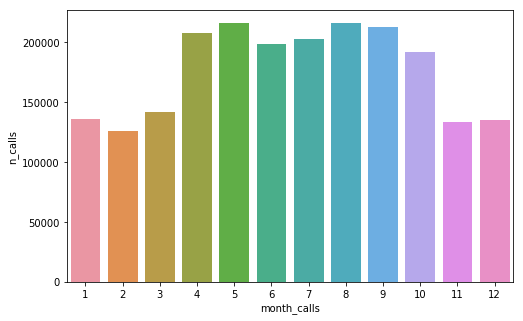

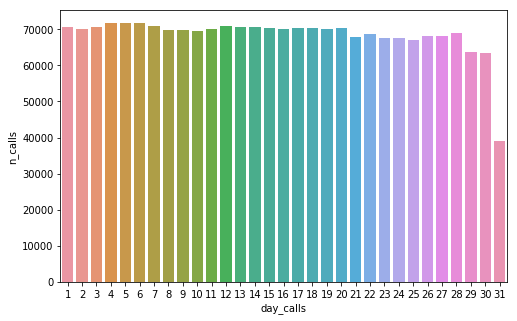

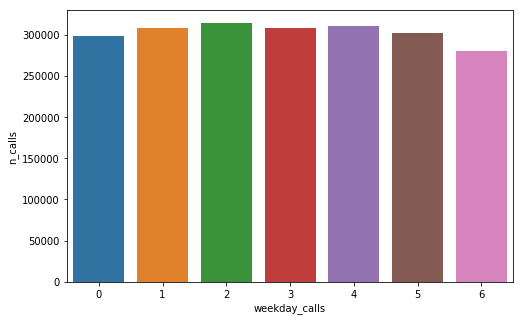

In [110]:
rcParams['figure.figsize'] = 8,5

dfg = df_ser.groupby('month_calls')['n_calls'].sum().reset_index()
ax1 = sns.barplot('month_calls', 'n_calls', data=dfg)
plt.show(ax1)
dfg = df_ser.groupby('day_calls')['n_calls'].sum().reset_index()
ax2 = sns.barplot('day_calls', 'n_calls', data=dfg)
plt.show(ax2)
dfg = df_ser.groupby('weekday_calls')['n_calls'].sum().reset_index()
ax3 = sns.barplot('weekday_calls', 'n_calls', data=dfg)
plt.show(ax3)

We can see most of the calls are reported during summer. There is no Specific Pattern for the calls during month end and also during weekends 

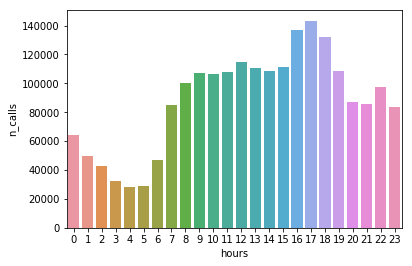

In [59]:
dfg = df_ser.groupby('hours')['n_calls'].sum().reset_index()
ax = sns.barplot('hours', 'n_calls', data=dfg)
plt.show()

We can see most of the calls are between 16:00 to 18:00 and crimes are very low during time 3:00 to 6:00 

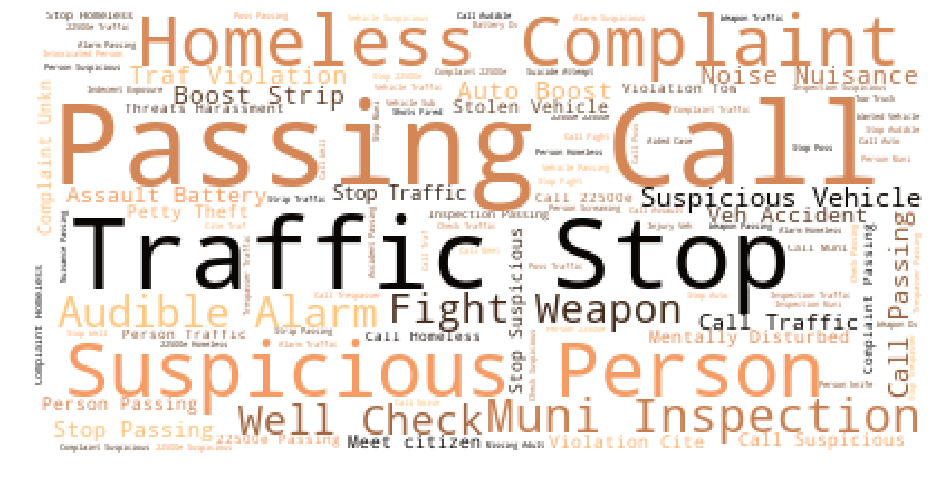

In [60]:
from wordcloud import WordCloud, STOPWORDS
str1 = " ".join(df_ser['Original Crime Type Name'].dropna())
wc =WordCloud(max_words = 1200, stopwords = STOPWORDS, colormap = 'copper', background_color = 'White').generate(str1)
plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.axis('off')
plt.title('');

We can see Majority of crime calls are for Passing Call, Traffic Stop, Homeless Complaint, Susipicious person

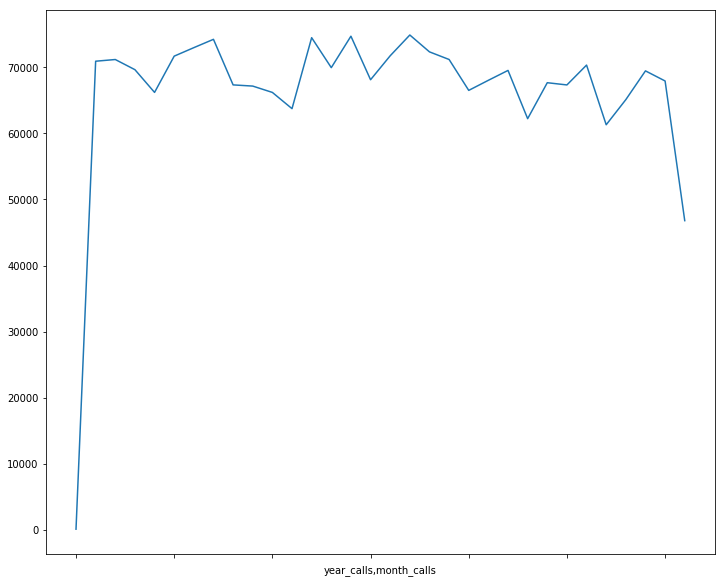

In [68]:
fig, ax = plt.subplots(figsize=(12,10))
#df_ser.head()
df_ser.dropna(subset = ['year_calls','month_calls','n_calls'])
df5 = df_ser.groupby(['year_calls','month_calls'])['n_calls'].sum().plot(x = ['year_calls','month_calls'],y='n_calls')
#plt.plot([df5['year_calls'],df5['month_calls']],df5['n_calls'])

In [71]:
df_inc['calls'] = 1
df_inc.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,calls
0,50436712,ASSAULT,BATTERY,Wednesday,2005-04-20T00:00:00,04:00,MISSION,NONE,18TH ST / CASTRO ST,-122.435003,37.760888,"{'latitude': '37.7608878061245', 'longitude': ...",5043671204134,1
1,80049078,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Sunday,2008-01-13T00:00:00,18:00,PARK,NONE,1100 Block of CLAYTON ST,-122.446838,37.762255,"{'latitude': '37.7622550270122', 'longitude': ...",8004907806304,1
2,130366639,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,2013-05-05T00:00:00,04:10,INGLESIDE,"ARREST, BOOKED",0 Block of SGTJOHNVYOUNG LN,-122.444707,37.724931,"{'latitude': '37.7249307267936', 'longitude': ...",13036663904012,1
3,30810835,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Tuesday,2003-07-08T00:00:00,01:00,SOUTHERN,"ARREST, BOOKED",MASON ST / TURK ST,-122.408954,37.783288,"{'latitude': '37.7832878735491', 'longitude': ...",3081083565050,1
4,130839567,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,2013-10-04T00:00:00,20:53,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793,"{'latitude': '37.7827931071006', 'longitude': ...",13083956765010,1


Count of Crimes based on Regions


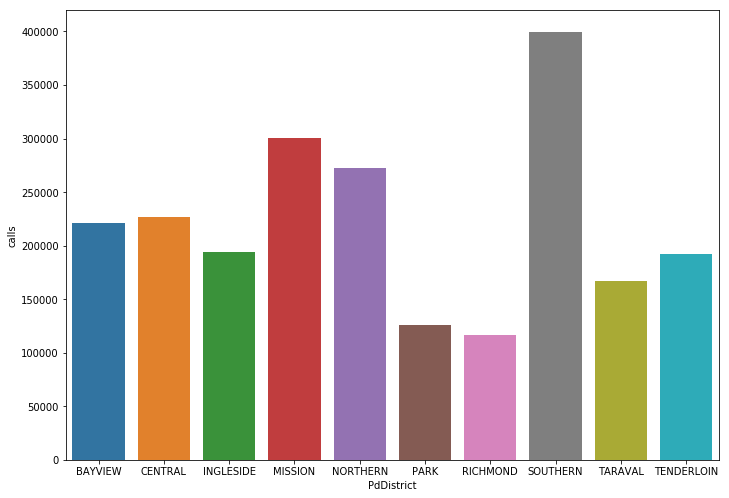

In [91]:

print("Count of Crimes based on Regions")
df6 = df_inc.groupby('PdDistrict')['calls'].sum().reset_index()
#df6.sort_values(by = df6['calls'])
ax = sns.barplot(x = 'PdDistrict',y =  'calls', data=df6)
rcParams['figure.figsize'] = 15,8.27
plt.show(ax)

From this Plot, we can observe that SOUTHERN Region has more number of crimes

Count of Crimes based on Categories


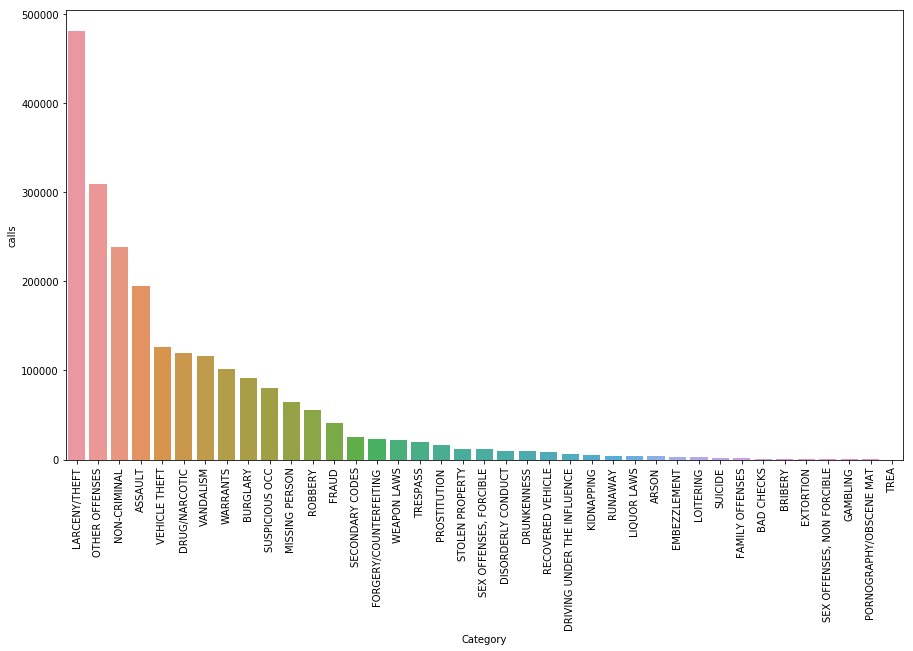

In [127]:
print("Count of Crimes based on Categories")
df6 = df_inc.groupby('Category')['calls'].count().reset_index()
#df6 = df6.sort('calls')
df6 = df6.sort_values(by = ['calls'],ascending = False)
ax = sns.barplot(x = 'Category',y =  'calls', data=df6)
rcParams['figure.figsize'] = 15,8.27
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show(ax)

We can observce majority of crimes are LRENCY/THEFT,OTHER OFFENCES, While the minimum crimes are Gamblimg, TREA